## Overall Introduction to the Assignment - All 4 models

**Problem Statement**: In the pursuit of leveraging financial data to forecast stock movements, deep learning models provide critical insights that can significantly enhance trading strategies. Stock price prediction, whether determining the direction of price movement (up/down) or predicting specific future prices, presents a complex challenge due to the inherently volatile and non-linear nature of financial markets. Knowing whether a stock will go up or down helps investors make an informed decision about buying, selling or taking a different position on the stock. If an investor can confidently (upto a certain level that is) predict the movement of the stock (up or down in our case) then they stand to profit tremendously. So we will be trying to predict whether a stock goes up or down in our use case.

**ML Model**: To address this, we propose the implementation of four sophisticated neural network architectures: Deep Learning for Classification, Deep Learning for Regression, Recurrent Neural Networks (RNNs), and Long Short-Term Memory networks (LSTMs). These models are chosen based on their unique capabilities to process time-series data and learn from the sequential dependencies and patterns in stock prices, which are crucial for generating accurate and timely predictions.

Neural Networks (NNs) are particularly well-suited for this task due to their ability to model non-linear relationships and interactively learn from large datasets. Their capacity for feature learning—automatically deriving the relevant characteristics from raw data—makes them superior for handling the multi-dimensional and dynamic nature of stock prices. Specifically:

1. Capability to Capture Non-linear Patterns: Stock prices are influenced by complex, non-linear interactions within the market. NNs excel in identifying and modeling these relationships, potentially leading to more accurate predictions compared to linear models or rule-based systems.
2. High Adaptability: NNs can be continuously trained on new data, allowing the model to adapt to new market conditions and trends, which is crucial in the ever-changing landscape of financial markets.
3. Integration of Diverse Data Types: NNs can integrate various types of data sources—such as price data, volume, news sentiment, and economic indicators—into a unified model, improving the robustness and accuracy of predictions.
4. Automated Feature Engineering: By leveraging techniques like deep learning, NNs reduce the need for manual feature selection, which can be biased or incomplete. This enables the model to uncover hidden insights from the data that may not be immediately apparent to human analysts.

By deploying a NN for classification on stock price data to predict buy or sell signals, investors and traders can potentially improve their decision-making process, enhance portfolio returns, and manage risks more effectively. This model could serve as a powerful tool in the arsenal of quantitative traders and portfolio managers, aligning with the broader shift towards automated and AI-driven investment strategies in finance.

In this assignment, we are asked to cover the following 4 Deep Learning models.
1. Deep Learning for Classification (Neural Networks): This approach utilizes neural networks to categorize future stock movements into discrete classes (e.g., 'buy' or 'sell'). By applying deep learning, the model can extract complex patterns and interactions in the data, which are essential for accurate classification in the chaotic environment of stock markets. Thus we try to predict the 'Price Up' column in our data.
2. Deep Learning for Regression (Neural Networks): In contrast to classification, regression models predict a continuous outcome—the future price of a stock. Deep neural networks, with their ability to model intricate nonlinear relationships, are particularly adept at forecasting precise stock prices by evaluating historical price data and other relevant financial indicators. Thus we try to predict the value of the 'Price Up' variable.
3. Recurrent Neural Networks (RNNs): RNNs are designed to handle sequential data, making them ideal for time-series analysis like stock price forecasting. Their ability to maintain a 'memory' of previous inputs allows them to make informed predictions based on the observed trends and patterns over time.
4. Long Short-Term Memory networks (LSTMs): A specialized form of RNNs, LSTMs excel in capturing long-term dependencies in time-series data, which is a common challenge in financial predictions. They mitigate the issue of vanishing gradients that often occurs with standard RNNs, thereby enhancing the model's learning capability and stability over long sequences.

The integration of these models into our stock prediction framework aims to exploit their complementary strengths—deep learning models' capacity for high-dimensional data interpretation, RNNs' sequential data processing, and LSTMs' long-term dependency modeling—to achieve superior prediction accuracy. This robust analytical approach is expected to unlock deeper insights into market dynamics and offer more reliable forecasts, thus providing a significant edge in the competitive landscape of stock trading. By implementing and comparing these models, we seek to identify the most effective methodologies for both predicting future stock prices and determining the optimal trading actions.

All these models have a similar dataset, a similar introductory and pre-processing stage, a similar model fitting step and a similar analysis step. Not only do we want to implement them but also at a high level, compare them. For this reason, we will use the same dataset for all models to get the respective outputs. **We will not have a different section for each model.** This will help us visualise/compare each model easily.

**Dataset Description:** We will source the data from Yahoo Finance. The stock for which we want to perform our analysis is 'Apple' and the timeframe is 1 Jan 2022 to 1 Jan 2023. There are multiple steps involved in collecting and processing the data which I will detail as we perform them instead of detailing them here. The choice of features to use as predictors is due to a high level understanding of what economic factors mostly influence the market (and hence the stock prices). These are speculative, and any other combination of factors can be used.

# Let the problem begin!

In [ ]:
import yfinance as yf

# The ticker for Apple stock is 'AAPL'
stock_symbol = 'AAPL'

# Set the start and end dates for the historical data
start_date = '2022-01-01'
end_date = '2023-01-01'

# Download historical stock price data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Display the data
stock_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.724533,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.443558,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.723572,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,169.840240,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.008118,86709100


Now we need to engineer a few new features which will give us a definite idea of whether the stock has gone up or down and by what margin.

In [ ]:
import numpy as np

#Percentage change of share price
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

#Whether the price has gone up or down
stock_data['Price_Up'] = np.where(stock_data['Daily_Return'] > 0, 1, 0)

stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Price_Up
Date,,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.724533,104487900,NaN,0
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.443558,99310400,-0.012692,0
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.723572,94537600,-0.026600,0
2022-01-06,172.699997,175.300003,171.639999,172.000000,169.840240,96904000,-0.016693,0
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.008118,86709100,0.000988,1


In [ ]:
# Add an index column to the dataset
stock_data = stock_data.reset_index()

# Now the DataFrame has 'Date' as a column as we added an index
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Price_Up
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,179.724533,104487900,NaN,0
1,2022-01-04,182.630005,182.940002,179.119995,179.699997,177.443558,99310400,-0.012692,0
2,2022-01-05,179.610001,180.169998,174.639999,174.919998,172.723572,94537600,-0.026600,0
3,2022-01-06,172.699997,175.300003,171.639999,172.000000,169.840240,96904000,-0.016693,0
4,2022-01-07,172.889999,174.139999,171.029999,172.169998,170.008118,86709100,0.000988,1


To help us achieve our goal, let us calculate a few commonly used technical analysis metrics. The reasons are mentioned.

**1. Simple Moving Average (SMA)**
* Description: The SMA is calculated by averaging the price of a stock over specific number of past days. Common periods for SMA are 50, 100, and 200 days but we will use a 20 day window.
* Use: It helps in identifying the trend direction and smoothing out price data by creating a constantly updated average price. A rising SMA indicates an uptrend, while a falling SMA suggests a downtrend. Traders might look for crossovers between short-term and long-term SMAs as signals for buying or selling.

**2. Relative Strength Index (RSI):**
* Description: RSI is a momentum oscillator that measures the speed and change of price movements on a scale from 0 to 100. Typically, the RSI is calculated using 14-day periods.
* Use: It is used to identify overbought or oversold conditions in a market. An RSI above 70 is considered overbought (suggesting a potential sell), whereas an RSI below 30 is considered oversold (indicating a potential buy). This can help traders anticipate potential reversals in the market.

**3. Bollinger Bands:**
* Description: This tool consists of three lines: the middle band is the SMA of the stock's price, and the upper and lower bands are typically two standard deviations away from the middle band.
* Use: Bollinger Bands help measure volatility and price levels over and under the average which could signify a buying or selling signal. Prices touching the upper band might signal that a stock is overbought, while prices at the lower band might indicate oversold conditions. The width of the bands also helps in understanding the market’s volatility.

**4. Exponential Moving Average(EMA)**
* The EMA gives more weight to recent prices, making it more responsive to new information when compared to the SMA. This is achieved by applying a multiplier to more recent prices. As we have an efficient built-in function for this, we will be using it directly.

In [ ]:
import pandas as pd
import numpy as np

# Calculate Simple Moving Average (SMA)
def calculate_sma(data, column='Adj Close', window=20):
    data['SMA'] = data[column].rolling(window=window).mean()
    return data

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, column='Adj Close', window=14):
    delta = data[column].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    data.loc[:, 'RSI'] = rsi
    return data

# Calculate Bollinger Bands
def calculate_bollinger_bands(data, column='Adj Close', window=20, num_std_dev=2):
    sma = data[column].rolling(window=window).mean()
    rolling_std = data[column].rolling(window=window).std()

    upper_band = sma + (num_std_dev * rolling_std)
    lower_band = sma - (num_std_dev * rolling_std)

    data.loc[:, 'Upper_Band'] = upper_band
    data.loc[:, 'Lower_Band'] = lower_band

    return data

# Let us apply these to our dataset
stock_data = calculate_sma(stock_data)
stock_data = calculate_rsi(stock_data)
stock_data = calculate_bollinger_bands(stock_data)

# Calculate 20-day EMA
stock_data['EMA'] = stock_data['Adj Close'].ewm(span=20, adjust=False).mean()
stock_data.head()

# Display the modified DataFrame with calculated indicators
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Price_Up,SMA,RSI,Upper_Band,Lower_Band,EMA
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,179.724533,104487900,NaN,0,NaN,NaN,NaN,NaN,179.724533
1,2022-01-04,182.630005,182.940002,179.119995,179.699997,177.443558,99310400,-0.012692,0,NaN,NaN,NaN,NaN,179.507297
2,2022-01-05,179.610001,180.169998,174.639999,174.919998,172.723572,94537600,-0.026600,0,NaN,NaN,NaN,NaN,178.861228
3,2022-01-06,172.699997,175.300003,171.639999,172.000000,169.840240,96904000,-0.016693,0,NaN,NaN,NaN,NaN,178.002087
4,2022-01-07,172.889999,174.139999,171.029999,172.169998,170.008118,86709100,0.000988,1,NaN,NaN,NaN,NaN,177.240756


In [ ]:
# As our rolling window period is 20 days, the first 19 entries will all have NaN values.
# Starting from the 20th entry (i.e. index number 19), we will consider our data.
stock_data = stock_data.dropna()
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Price_Up,SMA,RSI,Upper_Band,Lower_Band,EMA
19,2022-01-31,170.160004,175.000000,169.509995,174.779999,172.585327,115541600,0.026126,1,167.728600,53.502826,181.079958,154.377243,167.459752
20,2022-02-01,174.009995,174.839996,172.309998,174.610001,172.417480,86213900,-0.000973,0,167.363248,49.313848,179.693293,155.033202,167.931917
21,2022-02-02,174.750000,175.880005,173.330002,175.839996,173.632019,84914300,0.007044,1,167.172671,50.442477,178.952234,155.393107,168.474784
22,2022-02-03,174.479996,176.240005,172.119995,172.899994,170.728958,89418100,-0.016720,0,167.072940,51.025141,178.687240,155.458640,168.689467
23,2022-02-04,171.679993,174.100006,170.679993,172.389999,170.442245,82465400,-0.002950,0,167.103040,49.323808,178.750610,155.455470,168.856398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2022-12-23,130.919998,132.419998,129.639999,131.860001,130.959946,63814900,-0.002798,0,139.700882,26.261671,151.207514,128.194249,138.262166
247,2022-12-27,131.380005,131.410004,128.720001,130.029999,129.142441,69007800,-0.013878,0,138.996225,27.960324,151.290580,126.701870,137.393620
248,2022-12-28,129.669998,131.029999,125.870003,126.040001,125.179680,85438400,-0.030685,0,138.244889,26.152414,151.980057,124.509722,136.230388
249,2022-12-29,127.989998,130.479996,127.730003,129.610001,128.725311,75703700,0.028324,1,137.330176,30.302107,151.041513,123.618839,135.515619


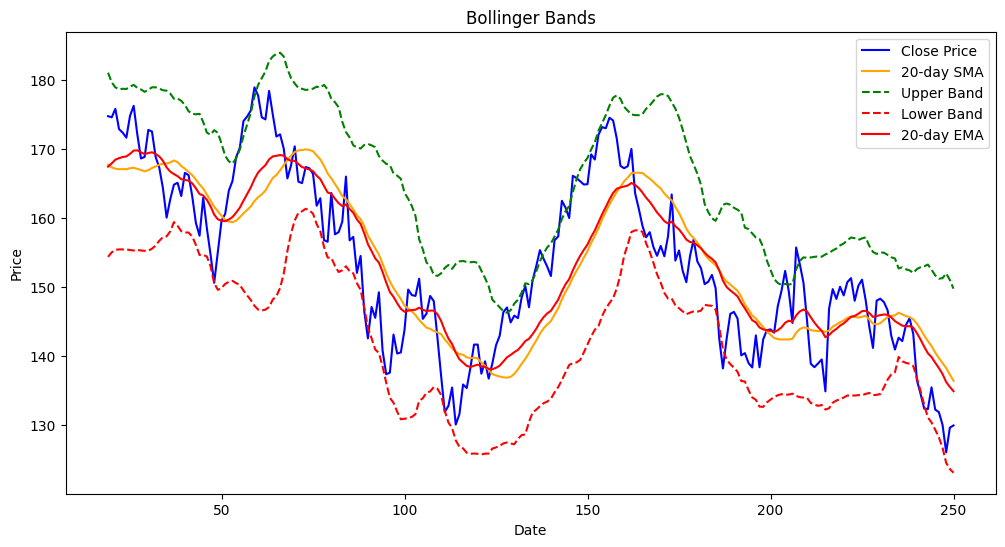

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Plotting the Bollinger Band Diagram
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Close Price', color='blue')
plt.plot(stock_data['SMA'], label='20-day SMA', color='orange')
plt.plot(stock_data['Upper_Band'], label='Upper Band', linestyle='--', color='green')
plt.plot(stock_data['Lower_Band'], label='Lower Band', linestyle='--', color='red')
plt.plot(stock_data['EMA'], label='20-day EMA', color='red')

plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

**Principal Component Analysis(PCA)**

PCA is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for computational efficiency. Smaller data sets are easier to explore and visualize, and thus make analyzing data points much easier and faster for machine learning algorithms without extraneous variables to process. So, to sum up, the idea of PCA is simple: reduce the number of variables of a data set, while preserving as much information as possible.

**Scaling the Data:**

Data scaling is the process of transforming the values of the features of a dataset till they are within a specific range, e.g. 0 to 1 or -1 to 1. This is to ensure that no single feature 'dominates' the distance calculations in an algorithm, and can help to improve the performance of the algorithm.

Scaling your data in machine learning is important because many algorithms use the L-2 norm between two data points in their computations, which is sensitive to the scale of the variables. If one variable is on a much larger scale than another, that variable will dominate the distance calculation, and the algorithm will be affected by that variable more than the other irrespective of the importance of that variable in being a predictor. Scaling the data can help to balance the impact of all variables on the distance calculation and can help to improve the performance of the algorithm.

Source: https://medium.com/codex/why-scaling-your-data-is-important-1aff95ca97a2

In the code that follows, we use the StandardScaler object from scikit-learn to standardize the features in both the training and testing sets. Standardization (or Z-score normalization) is a common preprocessing step in machine learning that helps to scale features to have zero mean and unit variance. As mentioned above, Standardizing features is important because it helps to ensure that all features contribute equally to the learning process, and it can improve the performance of certain machine learning algorithms. Keep in mind, we need to scale features on both - the training AND testing sets.

Usually the 5 columns --> Open, High, Low, Close and Adj Close are very highly correlated and thus it does not make sense to take all of them into consideration for our transformations. To visualise this, let us just quickly view the correaltion between them.

In [ ]:
#Define a dataframe for the 5 columns
corr_df = stock_data[['Open','Close','High','Low','Adj Close']]
corr_df.corr()

,Open,Close,High,Low,Adj Close
Open,1.000000,0.974086,0.991101,0.990848,0.973884
Close,0.974086,1.000000,0.989568,0.990568,0.999870
High,0.991101,0.989568,1.000000,0.991863,0.989176
Low,0.990848,0.990568,0.991863,1.000000,0.990555
Adj Close,0.973884,0.999870,0.989176,0.990555,1.000000


As expected, not a single value is less than 0.973, indicating that these variables are very highly correlated and that we do not need to include all of them as inputs to our model. Thus let us only consider 'Adj Close' for our use case. Also, the Adj Close Price is relatively the better metric to choose among all 5.

* Why?
* Because --> The adjusted closing price is a calculation adjustment made to a stock’s closing price. The original closing price is the final price in which a stock, or any other particular kind of security, trades during market hours on that specific trading day. However, the original closing price does not exemplify the most accurate valuation of the stock or security since it will not account for any actions that could’ve caused the price to shift. Therefore, an adjusted closing price will include any adjustments that need to be made to the price.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Taking only the required columns to further process our dataset.
features_for_pca = stock_data[['Adj Close', 'Volume','SMA','RSI','Upper_Band','Lower_Band','EMA']]

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features_for_pca)

In [ ]:
# Apply PCA to our feature space
pca = PCA()
principal_components = pca.fit_transform(features_standardized)

In [ ]:
#Visualising our dataset in terms of the co-ordinates on the principal component axes
pc_stock_data = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(features_standardized.shape[1])])

#As the index of the dataframe starts at 0, we need to change it to 19 to match our initial indexing
pc_stock_data.reset_index(drop=True, inplace=True)
pc_stock_data.index += 19

pc_stock_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
19,-3.158096,0.406623,1.154262,0.122298,0.347127,-0.037727,8.045186e-16
20,-3.081128,-0.187649,-0.013663,0.034098,0.369218,0.085072,1.833885e-16
21,-3.123249,-0.306294,-0.001340,-0.046660,0.405502,0.136918,1.109825e-15
22,-3.031483,-0.138345,0.136094,-0.049477,0.204300,0.149918,-3.421273e-16
23,-3.020403,-0.239266,-0.169756,-0.031854,0.208894,0.180615,6.788204e-16
...,...,...,...,...,...,...,...
246,3.206107,0.531007,-1.532310,0.162837,0.087755,0.034814,-1.412809e-16
247,3.385543,0.618265,-1.295302,0.268834,-0.001301,0.003045,-1.729714e-16
248,3.648277,1.210282,-0.813986,0.461187,-0.099533,-0.030046,-4.648949e-17
249,3.683256,0.650480,-0.936026,0.435893,0.065969,-0.035896,5.403971e-16


In [ ]:
# Concatenate the principal components DataFrame with the original DataFrame
stock_data_with_pca = pd.concat([stock_data, pc_stock_data], axis=1)
stock_data_with_pca

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Price_Up,SMA,...,Upper_Band,Lower_Band,EMA,PC1,PC2,PC3,PC4,PC5,PC6,PC7
19,2022-01-31,170.160004,175.000000,169.509995,174.779999,172.585327,115541600,0.026126,1,167.728600,...,181.079958,154.377243,167.459752,-3.158096,0.406623,1.154262,0.122298,0.347127,-0.037727,8.045186e-16
20,2022-02-01,174.009995,174.839996,172.309998,174.610001,172.417480,86213900,-0.000973,0,167.363248,...,179.693293,155.033202,167.931917,-3.081128,-0.187649,-0.013663,0.034098,0.369218,0.085072,1.833885e-16
21,2022-02-02,174.750000,175.880005,173.330002,175.839996,173.632019,84914300,0.007044,1,167.172671,...,178.952234,155.393107,168.474784,-3.123249,-0.306294,-0.001340,-0.046660,0.405502,0.136918,1.109825e-15
22,2022-02-03,174.479996,176.240005,172.119995,172.899994,170.728958,89418100,-0.016720,0,167.072940,...,178.687240,155.458640,168.689467,-3.031483,-0.138345,0.136094,-0.049477,0.204300,0.149918,-3.421273e-16
23,2022-02-04,171.679993,174.100006,170.679993,172.389999,170.442245,82465400,-0.002950,0,167.103040,...,178.750610,155.455470,168.856398,-3.020403,-0.239266,-0.169756,-0.031854,0.208894,0.180615,6.788204e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2022-12-23,130.919998,132.419998,129.639999,131.860001,130.959946,63814900,-0.002798,0,139.700882,...,151.207514,128.194249,138.262166,3.206107,0.531007,-1.532310,0.162837,0.087755,0.034814,-1.412809e-16
247,2022-12-27,131.380005,131.410004,128.720001,130.029999,129.142441,69007800,-0.013878,0,138.996225,...,151.290580,126.701870,137.393620,3.385543,0.618265,-1.295302,0.268834,-0.001301,0.003045,-1.729714e-16
248,2022-12-28,129.669998,131.029999,125.870003,126.040001,125.179680,85438400,-0.030685,0,138.244889,...,151.980057,124.509722,136.230388,3.648277,1.210282,-0.813986,0.461187,-0.099533,-0.030046,-4.648949e-17
249,2022-12-29,127.989998,130.479996,127.730003,129.610001,128.725311,75703700,0.028324,1,137.330176,...,151.041513,123.618839,135.515619,3.683256,0.650480,-0.936026,0.435893,0.065969,-0.035896,5.403971e-16


As explained above, PCA components are new features we engineer to capture the data more succinctly by using a lesser number of features. As covered in the lectures, components capture the maximum possible variance and hence act as good 'features'. Let us understand which component captures how much of the variance of the data.

In [ ]:
# Get the explained variance ratio for each principal component
# i.e. How much variance is captured by each component.
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each component
print("Explained Variance Ratio for Each Component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")

# We want to capture atleast 95% of the variance. This is a standard practise.
# Therefore, set a variance threshold (e.g., 95%)
variance_threshold = 0.95

# Identify the number of components needed to achieve the threshold
cumulative_variance = explained_variance_ratio.cumsum()
selected_components = (cumulative_variance < variance_threshold).sum() + 1

# Print the selected components
print(f"\nSelected Components to Achieve {variance_threshold*100}% Variance:")
for i in range(selected_components):
    print(f"PC{i+1}")
print(f"Number of Components: {selected_components}")

# Select the principal components based on the threshold
X_selected_pca = features_standardized[:, :selected_components]

Explained Variance Ratio for Each Component:
PC1: 0.6608
PC2: 0.2218
PC3: 0.0972
PC4: 0.0135
PC5: 0.0058
PC6: 0.0010
PC7: 0.0000

Selected Components to Achieve 95.0% Variance:
PC1
PC2
PC3
Number of Components: 3


In [ ]:
# Extract each PCA variable (principal component)
pca_variable_names = [f'PC{i+1}' for i in range(selected_components)]
pca_variables_df = pd.DataFrame(features_standardized[:, :selected_components], columns=pca_variable_names)

# Display the DataFrame with PCA variables
print("\nDataFrame with PCA Variables:")
print(pca_variables_df)


DataFrame with PCA Variables:
          PC1       PC2       PC3
0    1.644487  1.273125  1.350654
1    1.630967 -0.013420  1.316059
2    1.728799 -0.070431  1.298014
3    1.494956  0.127141  1.288571
4    1.471861 -0.177859  1.291421
..        ...       ...       ...
227 -1.708459 -0.996019 -1.303259
228 -1.854860 -0.768217 -1.369982
229 -2.174063 -0.047440 -1.441125
230 -1.888460 -0.474481 -1.527738
231 -1.862859 -0.416115 -1.614163

[232 rows x 3 columns]


In [ ]:
# Let us define the dataframe we will be working with.
final_df = stock_data_with_pca[['Date','PC1','PC2','PC3','Price_Up']]
final_df

,Date,PC1,PC2,PC3,Price_Up
19,2022-01-31,-3.158096,0.406623,1.154262,1
20,2022-02-01,-3.081128,-0.187649,-0.013663,0
21,2022-02-02,-3.123249,-0.306294,-0.001340,1
22,2022-02-03,-3.031483,-0.138345,0.136094,0
23,2022-02-04,-3.020403,-0.239266,-0.169756,0
...,...,...,...,...,...
246,2022-12-23,3.206107,0.531007,-1.532310,0
247,2022-12-27,3.385543,0.618265,-1.295302,0
248,2022-12-28,3.648277,1.210282,-0.813986,0
249,2022-12-29,3.683256,0.650480,-0.936026,1


In [ ]:
# Extract the features and the target variable from our dataframe
y = final_df['Price_Up']
X = final_df.drop(['Price_Up', 'Date'], axis=1)

While training a Machine Learning model, we split our 'Supervised' Dataset into a Training Dataset and a Testing Dataset. We use the training dataset to 'train' our model and the testing dataset to verify how accurate our trained model is at predicting on unknown data (The training data is unknown to the model as we have not used it to train the paramaters).

  1. X_train: This will be the training set of features (size = 80% of training set).
  2. X_test: This will be the testing set of features (size = 20% of testing set).
  3. y_train: This will be the corresponding training set of target values (size = 80% of training set).
  4. y_test: This will be the corresponding testing set of target values (size = 20% of testing set).

We can use the train_test_split function which randomly splits the data into training and testing sets. By default, 80% of the data will be used for training (X_train and y_train), and 20% will be used for testing (X_test and y_test), as specified by the test_size=0.2 argument. It is a standard practise to use an 80-20 split. The motivation behind this is loosely the Pareto principle.The Pareto principle is not a mathematically guaranteed property, but many observed phenomena follow the Pareto principle. As it is seen ubiquitous in nature, we try to emulate the same conjecture with our model. After all, we are trying to emulate 'intelligence'.

In [ ]:
# Import all necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# X contains our features and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize your features (optional but often recommended practise for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Initialize the FFNN classifier
# You can customize the architecture by specifying the number of hidden layers and neurons in each layer
clf = MLPClassifier(hidden_layer_sizes=(20), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Train the classifier
clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Accuracy: 0.55
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.48      0.53        25
           1       0.52      0.64      0.57        22

    accuracy                           0.55        47
   macro avg       0.56      0.56      0.55        47
weighted avg       0.56      0.55      0.55        47



The following explanation gives us a basic understanding of the meaning of the above terms and numbers. We will not dive into too much detail as this has been done in a previous assignment.

**Calculating the Confusion Matrix**
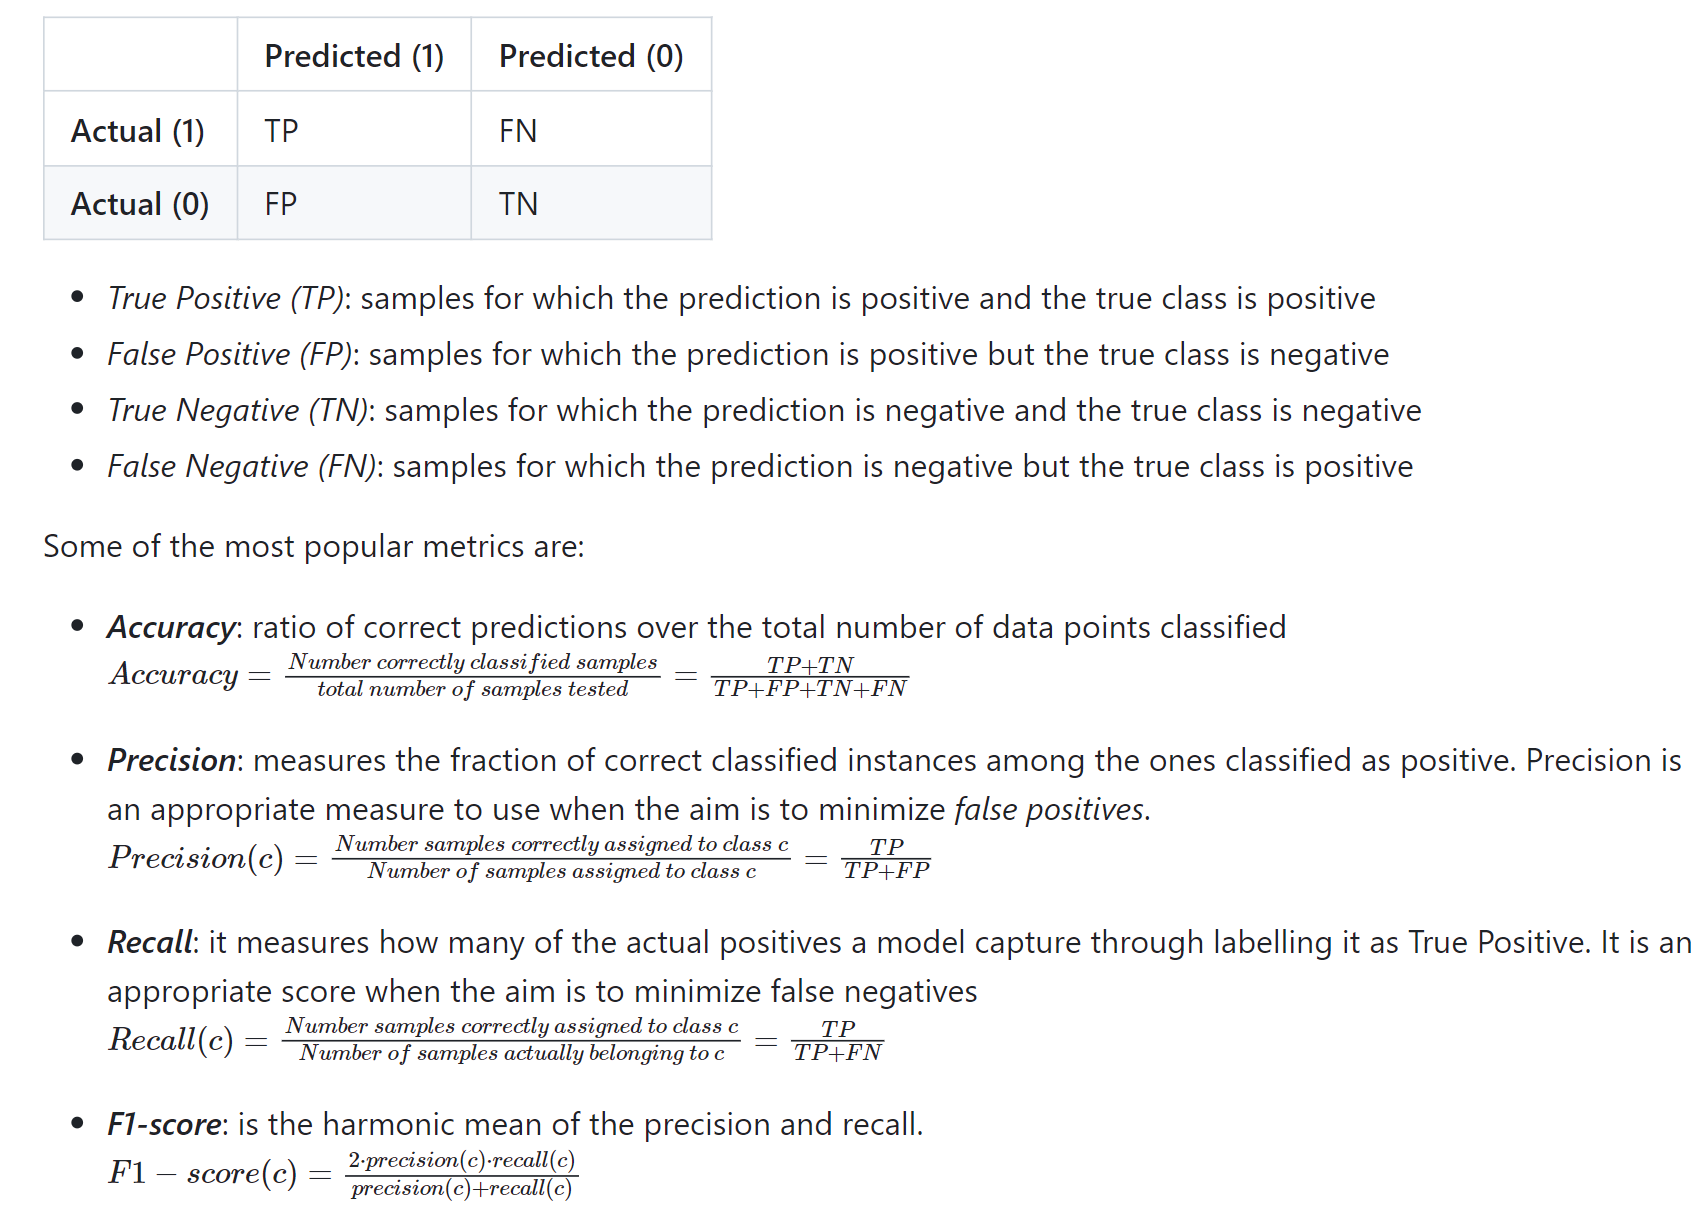

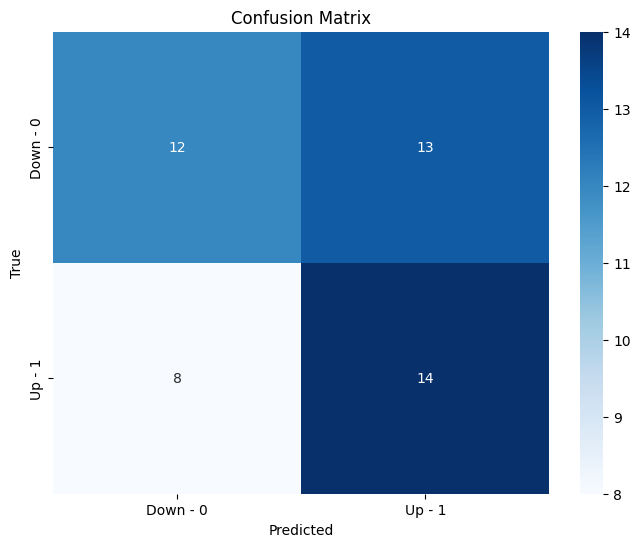

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you already have y_test and y_pred from your model

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Down - 0', 'Up - 1'], yticklabels=['Down - 0', 'Up - 1'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

(The following figues were at the time when I first ran the model. they may differ slightly when you run it)

Accuracy: 0.55 (55%)
This represents the overall accuracy of the model on the entire dataset.
It is the ratio of correctly predicted instances (sum of true positives and true negatives) to the total number of instances.

**Classification Report:**

1. Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives.
        Precision for class 0 (Down): 0.60
        Precision for class 1 (Up): 0.52

2. Recall (Sensitivity): Recall is the ratio of correctly predicted positive observations to the all observations in actual class.
        Recall for class 0 (Down): 0.48
        Recall for class 1 (Up): 0.64

3. F1-Score: The F1-Score is the weighted average of Precision and Recall. It ranges from 0 to 1, with 1 being the best possible F1-Score.
        F1-Score for class 0 (Down): 0.53
        F1-Score for class 1 (Up): 0.57

4. Support: The number of actual occurrences of the class in the specified dataset.
        Support for class 0 (Down): 25
        Support for class 1 (Up): 22

5. Macro Average: The unweighted average of precision, recall, and F1-Score for all classes. It treats all classes equally.
        Macro Average Precision: 0.56
        Macro Average Recall: 0.56
        Macro Average F1-Score: 0.55

6. Weighted Average: The weighted average of precision, recall, and F1-Score, weighted by the number of samples in each class.
        Weighted Average Precision: 0.56
        Weighted Average Recall: 0.55
        Weighted Average F1-Score: 0.55

**Interpretation:**

The model shows similar performance for both classes (0 and 1) based on precision, recall, and F1-Score. The overall accuracy is 55%, indicating that the model correctly predicts the class for approximately 55% of the instances. The precision, recall, and F1-Score provide a more detailed understanding of the model's performance for each class.

We see that this is not a very great accuracy. We can attribute this to multiple reasons:
1. I have used a very small set of variables which I speculated might help to predict the movement. These variables were clearly not the vest choice.
2. Predicting movement of stock is a very complex phenomenon and cannot be captured by such a simple architecture. We would need many more varibales and a different architecture as well maybe.

Now let us move ahead to the next part --> Deep Learning for Regression (Neural Netoworks). We will not detail the architectural intricacies of this model but just perform a computation.

In [ ]:
# Extract necessary features and the target variable from our master dataframe.
# We need to determine our independent variables and we have chosen the following.
features_reg = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA', 'RSI', 'Upper_Band', 'Lower_Band', 'EMA']
X_reg = stock_data[features_reg]
y_reg = stock_data['Daily_Return']

# Drop rows with NaN values (if necessary)
X_reg = X_reg.dropna()
y_reg = y_reg[X.index]

In [ ]:
X_reg

,Open,High,Low,Close,Volume,SMA,RSI,Upper_Band,Lower_Band,EMA
19,170.160004,175.000000,169.509995,174.779999,115541600,167.728600,53.502826,181.079958,154.377243,167.459752
20,174.009995,174.839996,172.309998,174.610001,86213900,167.363248,49.313848,179.693293,155.033202,167.931917
21,174.750000,175.880005,173.330002,175.839996,84914300,167.172671,50.442477,178.952234,155.393107,168.474784
22,174.479996,176.240005,172.119995,172.899994,89418100,167.072940,51.025141,178.687240,155.458640,168.689467
23,171.679993,174.100006,170.679993,172.389999,82465400,167.103040,49.323808,178.750610,155.455470,168.856398
...,...,...,...,...,...,...,...,...,...,...
246,130.919998,132.419998,129.639999,131.860001,63814900,139.700882,26.261671,151.207514,128.194249,138.262166
247,131.380005,131.410004,128.720001,130.029999,69007800,138.996225,27.960324,151.290580,126.701870,137.393620
248,129.669998,131.029999,125.870003,126.040001,85438400,138.244889,26.152414,151.980057,124.509722,136.230388
249,127.989998,130.479996,127.730003,129.610001,75703700,137.330176,30.302107,151.041513,123.618839,135.515619


In [ ]:
y_reg

19     0.026126
20    -0.000973
21     0.007044
22    -0.016720
23    -0.002950
         ...   
246   -0.002798
247   -0.013878
248   -0.030685
249    0.028324
250    0.002469
Name: Daily_Return, Length: 232, dtype: float64

In [ ]:
# Split our dataset into training and testing sets
# We will be using y_train_reg and y_test_reg as our target varible in training set and comparison for
# predicted variable in testing set respectively for all the next 3 models. Do not get confused by this.
from sklearn.model_selection import train_test_split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [ ]:
# Deploy our neural network regressor model
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Standardize features
scaler = StandardScaler()
X_train_scaled_ffnn = scaler.fit_transform(X_train)
X_test_scaled_ffnn = scaler.transform(X_test)

# Initialize FFNN regressor
ffnn_model = MLPRegressor(hidden_layer_sizes=(50,20), activation='relu', solver='adam', max_iter=500, random_state=42)

# Train the model
ffnn_model.fit(X_train_scaled_ffnn, y_train_reg)

# Make predictions on the test set
y_pred_ffnn = ffnn_model.predict(X_test_scaled_ffnn)

# Evaluate the performance
mse_ffnn = mean_squared_error(y_test_reg, y_pred_ffnn)
print(f"Mean Squared Error (FFNN): {mse_ffnn:.4f}")

Mean Squared Error (FFNN): 0.0048


In [ ]:
#Deploy our RNN model
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Standardize features
scaler_rnn = StandardScaler()
X_train_scaled_rnn = scaler_rnn.fit_transform(X_train_reg)
X_test_scaled_rnn = scaler_rnn.transform(X_test_reg)

# Reshape data for RNN
X_train_rnn = X_train_scaled_rnn.reshape((X_train_scaled_rnn.shape[0], 1, X_train_scaled_rnn.shape[1]))
X_test_rnn = X_test_scaled_rnn.reshape((X_test_scaled_rnn.shape[0], 1, X_test_scaled_rnn.shape[1]))

# Initialize RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='relu', input_shape=(1, X_train_scaled_rnn.shape[1])))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
rnn_model.fit(X_train_rnn, y_train_reg, epochs=50, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred_rnn = rnn_model.predict(X_test_rnn)

# Evaluate the performance
mse_rnn = mean_squared_error(y_test_reg, y_pred_rnn)
print(f"Mean Squared Error (RNN): {mse_rnn:.4f}")

Epoch 1/50
6/6 [==============================] - 2s 6ms/step - loss: 0.2146
Epoch 2/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0903
Epoch 3/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0559
Epoch 4/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0421
Epoch 5/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0313
Epoch 6/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0237
Epoch 7/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0192
Epoch 8/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0151
Epoch 9/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0124
Epoch 10/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0104
Epoch 11/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0089
Epoch 12/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0080
Epoch 13/50
6/6 [==============================] - 0s 5ms/step - loss: 0.

In [ ]:
# Deploy LSTM model
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Standardize features
scaler_lstm = StandardScaler()
X_train_scaled_lstm = scaler_lstm.fit_transform(X_train)
X_test_scaled_lstm = scaler_lstm.transform(X_test)

# Reshape data for LSTM
X_train_lstm = X_train_scaled_lstm.reshape((X_train_scaled_lstm.shape[0], 1, X_train_scaled_lstm.shape[1]))
X_test_lstm = X_test_scaled_lstm.reshape((X_test_scaled_lstm.shape[0], 1, X_test_scaled_lstm.shape[1]))

# Initialize LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(1, X_train_scaled_lstm.shape[1])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train_lstm, y_train_reg, epochs=50, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Evaluate the performance
mse_lstm = mean_squared_error(y_test_reg, y_pred_lstm)
print(f"Mean Squared Error (LSTM): {mse_lstm:.4f}")

Epoch 1/50
6/6 [==============================] - 2s 8ms/step - loss: 0.0022
Epoch 2/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 3/50
6/6 [==============================] - 0s 5ms/step - loss: 6.9710e-04
Epoch 4/50
6/6 [==============================] - 0s 5ms/step - loss: 5.7182e-04
Epoch 5/50
6/6 [==============================] - 0s 5ms/step - loss: 5.2067e-04
Epoch 6/50
6/6 [==============================] - 0s 5ms/step - loss: 5.2241e-04
Epoch 7/50
6/6 [==============================] - 0s 7ms/step - loss: 4.9753e-04
Epoch 8/50
6/6 [==============================] - 0s 8ms/step - loss: 4.7463e-04
Epoch 9/50
6/6 [==============================] - 0s 6ms/step - loss: 4.5528e-04
Epoch 10/50
6/6 [==============================] - 0s 6ms/step - loss: 4.4584e-04
Epoch 11/50
6/6 [==============================] - 0s 8ms/step - loss: 4.4132e-04
Epoch 12/50
6/6 [==============================] - 0s 7ms/step - loss: 4.3456e-04
Epoch 13/50
6/6 [================

Now let us plot a diagram to visualise the actual movement of prices vs what our 3 models have predicted. They are visualised in 3 different diagrams as seen below.

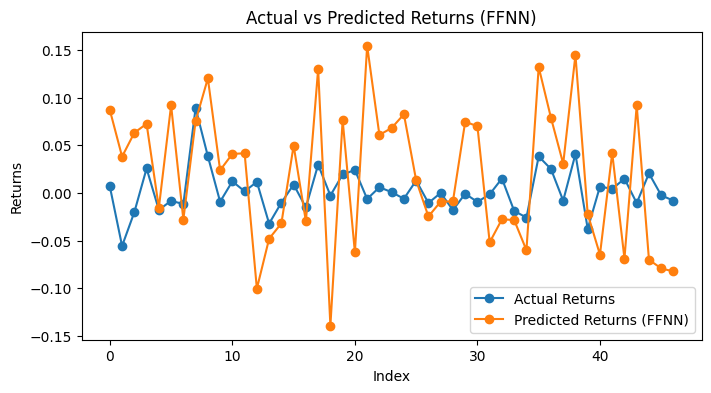

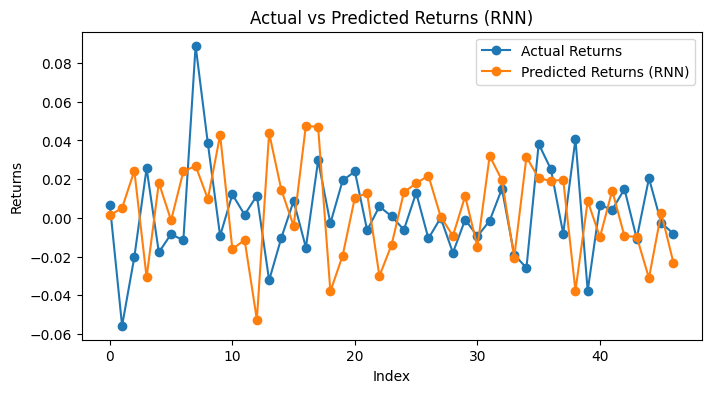

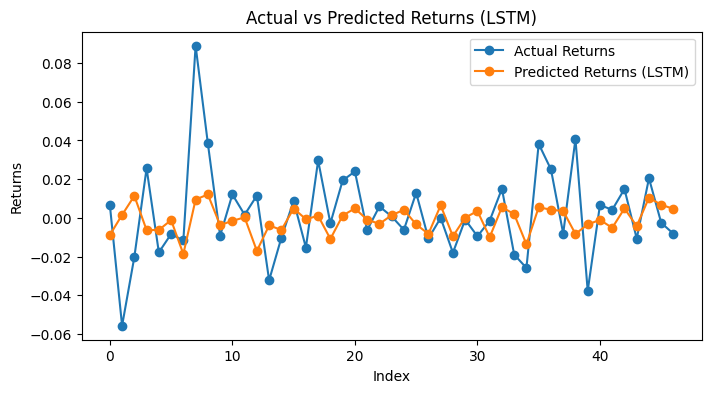

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create an array of indices for plotting
indices = np.arange(len(y_test_reg))

# Plot actual vs predicted returns for FFNN
plt.figure(figsize=(8, 4))
plt.plot(indices, y_test_reg, label='Actual Returns', marker='o')
plt.plot(indices, y_pred_ffnn, label='Predicted Returns (FFNN)', marker='o')
plt.title('Actual vs Predicted Returns (FFNN)')
plt.xlabel('Index')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Plot actual vs predicted returns for RNN
plt.figure(figsize=(8, 4))
plt.plot(indices, y_test_reg, label='Actual Returns', marker='o')
plt.plot(indices, y_pred_rnn, label='Predicted Returns (RNN)', marker='o')
plt.title('Actual vs Predicted Returns (RNN)')
plt.xlabel('Index')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Plot actual vs predicted returns for LSTM
plt.figure(figsize=(8, 4))
plt.plot(indices, y_test_reg, label='Actual Returns', marker='o')
plt.plot(indices, y_pred_lstm, label='Predicted Returns (LSTM)', marker='o')
plt.title('Actual vs Predicted Returns (LSTM)')
plt.xlabel('Index')
plt.ylabel('Returns')
plt.legend()
plt.show()

**ANALYSIS:**

1. Feedforward Neural Network (FFNN):
* *MSE: 0.0048*
* Interpretation: The average squared difference between the actual and predicted returns for the FFNN model is 0.0042. A higher MSE indicates a higher level of prediction error. Comparatively higher MSE suggests that the FFNN model may not be capturing the underlying patterns in the data as effectively.

2. Recurrent Neural Network (RNN):
* *MSE: 0.0013*
* Interpretation: The RNN model has a lower MSE compared to the FFNN (but higher than LSTM). A lower MSE suggests that the RNN is providing predictions that are closer to the actual returns. The RNN is performing better than the FFNN but not as well as the LSTM in terms of minimizing prediction errors.

3. Long Short-Term Memory (LSTM):
* *MSE: 0.0005*
* Interpretation: The LSTM model has the lowest MSE among the three models. This indicates that the LSTM is providing the most accurate predictions, with the smallest average squared difference between predicted and actual returns The LSTM is outperforming both the FFNN and RNN in terms of accuracy, with significantly lower prediction errors.

**Overall Observations:**

* LSTM Outperforms: The LSTM model consistently outperforms both the FFNN and RNN in terms of prediction accuracy, as indicated by the significantly lower MSE.
* RNN Improvement: The RNN model has a lower MSE compared to the FFNN, suggesting that it is capturing temporal dependencies better, but it still falls short of the performance achieved by the LSTM.
* Consider Data Characteristics: The differences in performance may be influenced by the characteristics of the dataset and the ability of each model to capture temporal dependencies in stock return data.
* Model Complexity: The complexity of the LSTM architecture allows it to capture long-term dependencies effectively, contributing to its superior performance.

**Recommendations:**
Leverage LSTM: Given the provided MSE values, the LSTM model appears to be the most effective for predicting stock returns in this context.

**Pros and Cons of the models:**

Feedforward Neural Network (FFNN):

Pros:

    * Simplicity: FFNNs are relatively simple and easy to implement.
    * Interpretability: The architecture of ffnn is straightforward, making it easier to interpret the learned weights.
    * Fast Training: Training FFNNs is often faster compared to more complex models.

Cons:

    * Limited Memory: FFNNs lack the memory of past sequences, which is crucial for time-series data like stock prices.
    * Not Ideal for Sequential Data: FFNNs might struggle with capturing temporal dependencies, which are important for time-series prediction tasks.
    * Potential Overfitting: Depending on the complexity of the architecture, FFNNs may be prone to overfitting, especially if the model has too many parameters.

Recurrent Neural Network (RNN):

Pros:

    * Temporal Dependencies: RNNs are designed to capture temporal dependencies, making them more suitable for time-series data.
    * Flexibility: RNNs can handle sequences of varying lengths.
    * Memory: RNNs have a form of memory that allows them to consider past information when making predictions.

Cons:

    * Vanishing/Exploding Gradient: Training RNNs can suffer from the vanishing or exploding gradient problem, affecting the learning of long-term dependencies.
    * Computationally Intensive: RNNs can be computationally intensive, and training may take longer compared to simpler models.
    * Limited Memory: While better than FFNNs, traditional RNNs still have limitations in capturing very long-term dependencies.

Long Short-Term Memory (LSTM):

Pros:

    * Effective Handling of Long-Term Dependencies: LSTMs are designed to address the vanishing gradient problem, allowing them to capture long-term dependencies.
    * Less Prone to Overfitting: LSTMs are generally less prone to overfitting compared to traditional RNNs.
    * Versatility: LSTMs can be used for various sequence-to-sequence tasks, making them versatile for time-series prediction.

Cons:

    * Complexity: LSTMs have a more complex architecture than FFNNs, making them harder to interpret.
    * Computationally Intensive: LSTMs can be computationally expensive, especially with large datasets and complex architectures.

Potential Overfitting:

    * All models, including FFNN, RNN, and LSTM, have the potential for overfitting, especially if the model architecture is too complex or if the training data is limited.
    * Regularization techniques (e.g., dropout) can be applied to mitigate overfitting.
    * The choice of hyperparameters, such as the number of layers and neurons, is crucial in determining the model's capacity and its susceptibility to overfitting.